In [3]:
import pandas as pd 
import numpy as np

### So our data is very dirty and messy we have many issues 


# Summary of the data 


### issues with the data set
# Dirty Data Issues
    Missing Values:
        In the paid column for most entries (e.g., "Not disclosed").
        In the review and posted_days columns for some entries (e.g., row 4, 4976, 4977, 4978).
    Inconsistent Formats:
        ex_year column has inconsistent formats like "1-4 Yrs" and "2-3 Yrs".
        posted_days column has inconsistent formats like "Just Now", "1 Day Ago", "22 Days Ago", "No data".
    Incorrect Data Entries:
        In the about column, special characters and encoding issues, such as "Bachelor s" instead of "Bachelor's".
        In the title column, "Data Scientist/Data Analyst" instead of "Data Scientist/Data Analyst".
    Duplicates:
        Potential duplicate entries based on title and companie columns need to be checked.
# Messy Data Issues
    Unstructured or Poorly Structured Data:

        about column contains long, unstructured text which can be difficult to process.
        tags column contains multiple skills/attributes concatenated with hyphens.
    Inconsistent Naming Conventions:

        title column has inconsistent use of capitalization (e.g., "Mis Executive" vs "MIS Executive").
        companie column has entries like "One of the premium client of Vector Recruitment Consultancy" which is verbose and inconsistent.
    Mixed Data Types:

        review column has numeric values but also entries like "No data".
        paid column has "Not disclosed" mixed with numeric salary ranges.
    Excessive Cleaning Required:

        about column often has fragmented sentences and mixed information that require extensive cleaning to be useful.
        The tags column will need splitting and normalization to be useful for analysis.
# Detailed Breakdown of Issues in Provided Data
### Dirty Data
    Missing Values:

        paid: Most entries have "Not disclosed".
        review: Some entries have "No data" (e.g., row 4, 4976, 4977, 4978).
        posted_days: Some entries have "No data" (e.g., row 4, 4976, 4977, 4978).
    Inconsistent Formats:

        ex_year: Inconsistent formats like "1-4 Yrs" and "2-3 Yrs".
        posted_days: Inconsistent formats like "Just Now", "1 Day Ago", "22 Days Ago".
    Incorrect Data Entries:

        about: Encoding issues such as "Bachelor s" instead of "Bachelor's".
        title: Incorrect escaping like "Data Scientist/Data Analyst".
    Duplicates:

        Potential duplicates need checking based on title and companie.
### Messy Data
    Unstructured or Poorly Structured Data:

        about: Long, unstructured text.
        tags: Multiple skills concatenated with hyphens.
    Inconsistent Naming Conventions:

        title: Inconsistent capitalization.
        companie: Verbose and inconsistent naming.
    Mixed Data Types:

        review: Numeric values and "No data".
        paid: "Not disclosed" mixed with numeric ranges.
    Excessive Cleaning Required:

        about: Fragmented sentences and mixed information.
        tags: Needs splitting and normalization.

In [ ]:
import pandas as pd

# Specify the engine as 'openpyxl'
analyst = pd.read_excel(r"C:\Users\Dell\OneDrive\Desktop\advance web scraping\Nakri_data_set\Skill_Gap_Analysis_Tool\Data\data_analiystjobs_data.xlsx", engine='openpyxl')
science = pd.read_excel(r"C:\Users\Dell\OneDrive\Desktop\advance web scraping\Nakri_data_set\data_scienetist_jobs_data.xlsx", engine='openpyxl')
software = pd.read_excel(r"C:\Users\Dell\OneDrive\Desktop\advance web scraping\Nakri_data_set\Skill_Gap_Analysis_Tool\Data\software_jobs_data.xlsx", engine='openpyxl')
web = pd.read_excel(r"C:\Users\Dell\OneDrive\Desktop\advance web scraping\Nakri_data_set\Skill_Gap_Analysis_Tool\Data\web_dev_jobs_data.xlsx", engine='openpyxl')
science.rename(columns={'title ': 'title'}, inplace=True)

# Merge the data frames into a single data frame
df = pd.concat([analyst, science, software, web], axis=0, ignore_index=True)




In [ ]:
# `# pd.reset_option('all')
# science.rename(columns={'title ': 'title'}, inplace=True)
# # web.columns
# # df.columns
# df`

pd.reset_option('all')

In [ ]:

# Now set the display options again
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)  # Use -1 for pandas versions before 1.0


In [ ]:
df

In [ ]:
df.tail()

In [ ]:
df

In [ ]:
df.info()

In [ ]:
# df[df['title'] ==  'Data Analyst (Vietnamese)'].str.replace('Data Analyst (Vietnamese)','Data Analyst')
# df['Job post length'] = df['title'].str.len()
# df['Job post length'].value_counts().sort_index()

# # df['Job post length']  = df['Job post length'].astype(int)
# df['min_year'] = df['ex_year'].str.replace(' Yrs', '').str.split('-',expand=True)[0]
# df['max_year'] = df['ex_year'].str.replace(' Yrs', '').str.split('-',expand=True)[1]


In [ ]:
import re
# def count_words(row):
#     # Split the row by spaces and commas
#     words = re.split(r'[ ,]+', row)
#     # Filter out numbers
#     words = [word for word in words if not word.isdigit()]
#     # Return the word count
#     return len(words)
def branch_count(number):
    # Return 1 if number is greater than 2, otherwise return 0
    if number > 2:
        return 1
    else:
        return 0

# Apply the branch_count function to the 'more_branch' column
df['+3_branches'] = df['more_branch'].apply(branch_count)
df1= df.copy()

In [ ]:
df = df1
df

In [ ]:
# Find the index of rows where 'posted_days' is 'Just Now'
just_now_index = df[df['posted_days'] == 1].index

# Update the 'Just Now' column to 1 for those rows using .loc
df.loc[just_now_index, 'posted_days'] = 0

In [ ]:
df['days'] = df['posted_days'].str.split( " ",expand=True)[0]

In [ ]:
df['posted_days'].value_counts()

In [ ]:
# df['days'] = df['posted_days'].str.split(" ",expand=True)[0]
# df['days'] = df['days'].str.replace('Starts' , '-90').replace('Few', '1').replace('Today', '0').replace('No', '4')
# df['days'] = df['days'].astype(int)
# df.drop(columns=['Just Now'],inplace=True)
# df['ex_year'].str.replace('Yrs')
df


In [ ]:
df['days'] = df['posted_days'].str.split(" ",expand=True)[0]
df['days'] = df['days'].str.replace('Starts' , '-90').replace('Few', '1').replace('Today', '0').replace('No', '4')
# df['days'] = df['days'].astype(int)

df['days']=  df['days'].str.replace('Just','1')

def convert_to_int(value):
    if value.endswith('+'):
        return int(value[:-1])
    elif value.startswith('+'):
        return int(value[1:])
    else:
        return int(value)

# Apply the function to the column
df['days'] = df['days'].apply(convert_to_int)
df

In [ ]:
# df['min_year'] = df['min_year'].fillna('0')
# df['max_year'] = df['max_year'].fillna('0')
# df['max_year'] = df['max_year'].str.replace('No data', '0')
# df['min_year'] = df['min_year'].str.replace('No data', '0')

# df['min_year'] = df['min_year'].astype(int)
# df['max_year'] = df['max_year'].astype(int)

# # df['max_year'].value_counts()

df['paid'] = df['paid'].str.replace('Unpaid','0-0')
df['paid'] = df['paid'].str.replace(' PA','')
df['tags'].str.split('-',expand=True).info()

In [ ]:
# df['skill_1'] = df['tags'].str.split('-',expand=True)[0]
# df['skill_2'] = df['tags'].str.split('-',expand=True)[1]
# df['skill_3'] = df['tags'].str.split('-',expand=True)[2]
# df['skill_4'] = df['tags'].str.split('-',expand=True)[3]
# df['skill_5'] = df['tags'].str.split('-',expand=True)[4]
# df['skill_6'] = df['tags'].str.split('-',expand=True)[5]
# df['skill_7'] = df['tags'].str.split('-',expand=True)[6]
# df['skill_8'] = df['tags'].str.split('-',expand=True)[7]
# df['skill_9'] = df['tags'].str.split('-',expand=True)[8]
# df['skill_10'] = df['tags'].str.split('-',expand=True)[9]
# df

In [ ]:
# df['tags']

In [ ]:
# df.drop(columns=['ex_year'],inplace=True)


In [ ]:
# df.drop(columns=['posted_days'],inplace=True)

In [ ]:
df = df1 
df.columns

In [ ]:
!huggingface-cli login


In [ ]:
!pip install transformers

In [ ]:
# import pandas as pd
# from transformers import pipeline

# # Load the pre-trained language model for text generation
# text_generator = pipeline('text-generation', model='gpt2')

# # Sample data (replace with your actual DataFrame)
# data = pd.Series([
#     "Proven experience as inventory manager or similar position.",
#     ". Data collection, processing and analysing the data and generating the reports provide...",
#     "Bachelor's degree in Marketing, Business, or a related field. 1-2 years of hands-on ex...",
#     # Add more rows as needed
# ])

# # Function to complete text using the GPT-2 model
# def complete_text(text):
#     if text.endswith('...'):
#         # Generate completion using the language model
#         completion = text_generator(text, max_length=100, num_return_sequences=1)
#         completed_text = completion[0]['generated_text']
#         return completed_text
#     return text

# # Apply the function to the dataset
# data_completed = data.apply(complete_text)

# # Print the cleaned and completed dataset
# print(data_completed)


In [ ]:
# import pandas as pd
# from transformers import pipeline

# # Load the pre-trained language model for text generation
# text_generator = pipeline('text-generation', model='gpt2')

# # Sample data

# # Function to complete text using GPT model
# # df = pd.DataFrame(data)

# # Function to complete text using GPT-2 model
# def complete_text(text):
#     if text.endswith('...'):
#         # Generate completion using the language model
#         completion = text_generator(text, max_length=100, num_return_sequences=1)
#         completed_text = completion[0]['generated_text']
#         return completed_text
#     return text

# # Apply the function to the 'about' column of the DataFrame
# df['about'] = df['about'].apply(complete_text)

# # Print the cleaned and completed dataset
# print(df['about'])

In [381]:
# df['is_remote'] = df['location'].apply(lambda x: 1 if x == 'Remote' else 0)


df

# Update 'is_remote' column where 'about' column contains 'Remote'
# df.loc[, 'is_remote'] = 1
df['review']

0            4.1
1            3.9
2            3.8
3            4.0
4        No data
          ...   
16852        3.0
16853        3.5
16854    No data
16855    No data
16858        4.0
Name: review, Length: 10283, dtype: object

In [406]:
def fill_no_data(df, column):
    for i in range(len(df) - 1):
        if df.iloc[i][column] == 'No data':
            df.iloc[i, df.columns.get_loc(column)] = df.iloc[i - 4][column]
    return df

# Apply the function to the 'review' column
df = fill_no_data(df, 'review')


# df.columns  max_year review +3_branches

Index(['title', 'companie', 'paid', 'location', 'about', 'tags', 'review',
       'Job post length', 'min_year', 'max_year', 'more_branch', '+3_branches',
       'days', 'skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5',
       'skill_6', 'skill_7', 'skill_8', 'skill_9', 'skill_10', 'is_remote'],
      dtype='object')

In [416]:
df['review'] = df['review'].astype(float)
df['review']

0        4.1
1        3.9
2        3.8
3        4.0
4        4.2
        ... 
16852    3.0
16853    3.5
16854    4.0
16855    4.0
16858    4.0
Name: review, Length: 10283, dtype: float64

In [419]:
df['norm_review'] = (df['review'] - df['review'].min()) / (df['review'].max() - df['review'].min())
df['norm_branches'] = df['+3_branches']  # No need to normalize as it's binary
df['norm_max_year'] = (df['max_year'] - df['max_year'].min()) / (df['max_year'].max() - df['max_year'].min())

# Combine normalized scores into a composite score
df['composite_score'] = df['norm_review'] + df['norm_branches'] + df['norm_max_year']

# Categorize the composite scores into five size categories
df['Company Size'] = pd.qcut(df['composite_score'], 5, labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large'])

df



,title,companie,paid,location,about,tags,review,Job post length,min_year,max_year,...,skill_7,skill_8,skill_9,skill_10,is_remote,norm_review,norm_branches,norm_max_year,composite_score,Company Size
0,Data Analyst,Nvent,Not disclosed,Mumbai,"Bachelor s degree from an accredited institution required (preferably in Business, Comm...",Data Analysis-power BI-Data Analyst-Tableau-analytical skills-customer support-Analytical Skill-Bi,4.1,12,2,3,...,Analytical Skill,Bi,None,None,0,0.775,0,0.100000,0.875000,Medium
1,Data Analyst,Techup Labs,Not disclosed,Remote,". Proficiency in web scraping tools and techniques, especially using Python and Seleniu...",Data validation-github-Google Analytics-Data modeling-Data Analyst-Selenium-data visualization-Python,3.9,12,1,4,...,data visualization,Python,None,None,1,0.725,0,0.133333,0.858333,Small
2,Data Analyst,Osttra,Not disclosed,Ahmedabad,Willing to work in 24*5 environment on rotational shifts (including night shifts) . Cer...,Supply chain-Content management-Automation-Publishing-Process improvement-Analytical-Analytics-Secondary research,3.8,12,1,3,...,Analytics,Secondary research,None,None,0,0.700,0,0.100000,0.800000,Small
3,Data Analyst (Vietnamese),Lightcast,Not disclosed,Remote,"Bachelor s degree in Linguistics, Data Analytics, NLP or similar (preferred) . Skills /...",Data analysis-Excel-Machine learning-Linguistics-Data quality-Data analytics-Data Analyst-SQL,4.0,25,0,4,...,Data Analyst,SQL,None,None,1,0.750,0,0.133333,0.883333,Medium
4,Data Scientist\/Data Analyst,Tems Tech Solutions,Not disclosed,Chennai,"Bachelor s degree in Computer Science, Statistics, Mathematics, or related fieldProven ...",Computer science-Automation-data science-Machine learning-Data collection-Data structures-Data Analyst-Analytics,4.2,28,2,5,...,Data Analyst,Analytics,None,None,0,0.800,0,0.166667,0.966667,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16852,Associate - IT,Eurofins,Not disclosed,Bengaluru,We are looking for a motivated Information Security Analyst to run Information Securi...,remediation-Change management-Information Security Analyst-Web technologies-Cloud Services-Information security-Vulnerability-Vulnerability management,3.0,14,1,3,...,Vulnerability,Vulnerability management,None,None,0,0.500,0,0.100000,0.600000,Very Small
16853,SAP Hybris / Commerce Developer,Vimerse Infotech,Not disclosed,Chennai,Vimerse Infotech is looking for SAP Hybris / Commerce Developer to join our dynamic tea...,css-web services-hybris-impex-jsp-sap erp-hibernate-sap hybris,3.5,31,2,7,...,hibernate,sap hybris,None,None,0,0.625,0,0.233333,0.858333,Small
16854,Customer Relationship Executive international BPO,Leading MNC BPO Company,2.75-4,"Mohali, Punjab, Chandigarh, Chandigarh, Kharar, Punjab",full salary for training period as well. 8146555305 candidates must have Good comm skil...,Query Resolution-Chat Process-Fresher-Inbound Process-Blended Process-bpo-Email Support-cce,4.0,49,0,5,...,Email Support,cce,None,None,0,0.750,1,0.166667,1.916667,Very Large
16855,Email Support Associate For international BPO,Leading MNC BPO Company in Mohali location,2.5-4,"Mohali, Punjab, Chandigarh, Chandigarh, Kharar, Punjab",call now Ms.Chadni 6230972380 candidates must have Good comm skills with good knowledge...,Email Process-Blended Process-Cce-customer service-Solving Queries-Non Voice-Bpo Non Voice-International Chat Process,4.0,45,0,5,...,Bpo Non Voice,International Chat Process,None,None,0,0.750,1,0.166667,1.916667,Very Large


In [425]:
# df.rename(columns={'tags': 'all_skills_need', 'all_skills_need': 'review'}, inplace=True)
df[['title','companie','all_skills_need','Company Size']].sample(30)

,title,companie,all_skills_need,Company Size
501,Lead-Platform Data Analyst,Saltmine,Procurement-SAN-Data analysis-Analytical-Data processing-Data Analyst-Outsourcing-Information management,Very Large
9675,Lead / Senior AI Engineer,Cloudeq,Customer satisfaction-Analytical-Machine learning-Cloud-Database-Manager Technology-Data processing-Statistics,Medium
15836,Chat And Email Support Executive- 35k CTC - Job Location- Ahmedabad,Credible Consultancy,BPO-International Call Center-US Shift-Bpo Non Voice-Chat Process-Customer Service-CSR-Non Voice Process,Very Large
3128,MIS Executive,Updater Services (UDS),Payroll-KYC-MIS-Pivot Table-Kyc Operations-VLOOKUP-Formulas-Advanced Excel,Small
10133,Software Developer,World Fashion Exchange,Analytical skills-Software design-jQuery-PDF-VB.NET-Javascript-HTML-SQL,Small
2336,Operations Analyst,Valtitude / Demand Planning Net,Data analysis-Supply chain management-Project reports-Demand planning-French-Production planning-Analytical-Inventory management,Large
3360,Service Management Associate - Reporting,Accenture,service management-networking-post production-installation-troubleshooting-configuring-software testing-production,Small
2357,Product Analyst,"Solutioninn, Us",Data analysis-PPC-Web analytics-Analytical-Social media-Digital marketing-Continuous improvement-Forecasting,Very Large
11152,Lead Software Developer,Craftner,java-Lead Software-Software-Development-Software development,Very Small
14238,Dot Net developer,Diverse Lynx,SIDE-MCSD-Web development-Programming-Visual Studio-microsoft-ASP.Net MVC-professional,Large


In [358]:
df['location'] = df['location'].str.replace('Delhi / NCR', 'Gurugram').replace('Gurgaon','Gurugram').replace('Gurgaon/Gurugram','Gurugram')
df['location'].value_counts()

Bengaluru                                                1443
Gurugram                                                  922
Noida                                                     906
New Delhi                                                 751
Mumbai                                                    516
                                                         ... 
Mumbai(Nariman Point)                                       1
Kolkata(Chinar Park +4)                                     1
Mumbai, Hyderabad, Pune, Chennai, Gurugram, Bengaluru       1
Hybrid - Bangalore Rural, Gurugram                          1
haveri                                                      1
Name: location, Length: 1127, dtype: int64

In [427]:
def categorize_job_title(title):
    title_lower = title.lower()
    if any(keyword in title_lower for keyword in ['data', 'analyst', 'mis']):
        return 'Data and Analysis'
    elif any(keyword in title_lower for keyword in ['developer', 'engineer', 'programmer']):
        return 'Developer and Engineering'
    elif any(keyword in title_lower for keyword in ['support', 'customer', 'chat', 'service']):
        return 'Customer Support'
    elif any(keyword in title_lower for keyword in ['marketing', 'sales', 'product']):
        return 'Marketing and Sales'
    elif any(keyword in title_lower for keyword in ['lead', 'manager', 'management', 'strategic']):
        return 'Management and Strategic Roles'
    elif any(keyword in title_lower for keyword in ['design', 'designer', 'creative']):
        return 'Creative and Design'
    elif any(keyword in title_lower for keyword in ['research', 'researcher']):
        return 'Research'
    else:
        return 'Others'

# Apply the function to create the new column
df['Job Category'] = df['title'].apply(categorize_job_title)
df['Job Category'].value_counts()

Developer and Engineering         3650
Data and Analysis                 2635
Others                            2147
Marketing and Sales                580
Creative and Design                465
Management and Strategic Roles     426
Customer Support                   270
Research                           110
Name: Job Category, dtype: int64

In [441]:
skill_categories = {
    'data analysis': 'Data Analysis',
    'power bi': 'Business Intelligence (BI)',
    'tableau': 'Business Intelligence (BI)',
    'analytical skills': 'Data Analysis',
    'customer support': 'Customer Support',
    'bi': 'Business Intelligence (BI)',
    'data validation': 'Data Analysis',
    'github': 'Programming',
    'google analytics': 'Data Analysis',
    'data modeling': 'Data Analysis',
    'selenium': 'Programming',
    'data visualization': 'Data Analysis',
    'python': 'Programming',
    'supply chain': 'Supply Chain Management',
    'content management': 'Supply Chain Management',
    'automation': 'Supply Chain Management',
    'publishing': 'Supply Chain Management',
    'process improvement': 'Supply Chain Management',
    'secondary research': 'Supply Chain Management',
    'data processing': 'Data Analysis',
    'excel': 'Data Analysis',
    'machine learning': 'Machine Learning',
    'linguistics': 'Data Analysis',
    'data quality': 'Data Analysis',
    'sql': 'Database Management',
    'computer science': 'Computer Science',
    'data science': 'Computer Science',
    'data collection': 'Data Analysis',
    'data structures': 'Computer Science',
    'data assessment': 'Data Analysis',
    'coding': 'Programming',
    'web api': 'Programming',
    'macros': 'Programming',
    'advance excel': 'Data Analysis',
    'a/b testing': 'Data Analysis',
    'regression': 'Machine Learning',
    'predictive modeling': 'Machine Learning',
    'modeling': 'Machine Learning',
    'manager quality assurance': 'Operations Management',
    'trend analysis': 'Data Analysis',
    'managed services': 'Operations Management',
    'networking': 'Network and Infrastructure',
    'talent acquisition': 'Operations Management',
    'data integrity': 'Data Analysis',
    'data governance': 'Data Governance',
    'data analyst': 'Data Analysis',
    'data modelling': 'Data Analysis',
    'etl': 'Data Governance',
    'business analytics': 'Data Analysis',
    'database management': 'Database Management',
    'policy writing': 'Data Analysis',
    'claims': 'Data Analysis',
    'business intelligence': 'Business Intelligence (BI)',
    'artificial intelligence': 'Machine Learning',
    'mechanical': 'Data Analysis',
    'intelligence': 'Machine Learning',
    'loans': 'Financial Services',
    'administration': 'Operations Management',
    'pricing analysis': 'Financial Services',
    'wealth management': 'Financial Services',
    'reconciliation': 'Financial Services',
    'asset management': 'Financial Services',
    'statistics': 'Statistics',
    'mining': 'Customer Analytics',
    'business analysis': 'Customer Analytics',
    'business opportunity': 'Operations Management',
    'architecture': 'Operations Management',
    'sap crm': 'Database Management',
    'sql server': 'Database Management',
    'mysql': 'Database Management',
    'postgresql': 'Database Management',
    'vba coding': 'Programming',
    'client interaction': 'Operations Management',
    'interpretation': 'Operations Management',
    'ms office': 'Operations Management',
    'training': 'Operations Management',
    'e-commerce': 'Operations Management',
    'data entry': 'Operations Management',
    'deep learning': 'Machine Learning',
    'data privacy': 'Data Privacy',
    'gdpr': 'Data Privacy',
    'pci dss': 'Data Privacy',
    'hipaa': 'Data Privacy',
    'cipp': 'Data Privacy',
    'nist': 'Data Privacy',
    'ccpa': 'Data Privacy',
    'client development': 'Client Development',
    'industry research': 'Research and Analysis',
    'consulting': 'Consulting',
    'management': 'Management',
    'recruitment': 'Recruitment',
    'research': 'Research and Analysis',
    'it services': 'IT Services',
    'online research': 'Research and Analysis',
    'san': 'Storage Area Network (SAN)',
    'project management': 'Project Management',
    'market research': 'Market Research',
    'market development': 'Market Development',
    'pharma': 'Pharmaceuticals',
    'strategic planning': 'Strategic Planning',
    'healthcare': 'Healthcare',
    'clinical research': 'Clinical Research',
    'audit': 'Audit',
    'us regulations': 'Regulatory Compliance',
    'risk': 'Risk Management',
    'compliance': 'Compliance',
    'financial crime': 'Financial Crime',
    'audit': 'Audit',
    'clinical data management': 'Clinical Data Management',
    'cdm': 'Clinical Data Management',
    'clinical trials': 'Clinical Trials',
    'medidata rave': 'Medidata Rave',
    'conduct': 'Conduct',
    'closeout': 'Closeout',
    'startup': 'Startup',
    'direct taxation': 'Taxation',
    'indirect taxation': 'Taxation',
    'international taxation': 'Taxation',
    'international': 'International',
    'third party': 'Third Party',
    'direct tax': 'Taxation',
    'private equity': 'Private Equity',
    'investran': 'Investran',
    'capital calls': 'Capital Calls',
    'calling': 'Calling',
    'equity': 'Equity',
    'analysis': 'Analysis',
    'research specialist': 'Research and Analysis',
    'hubspot': 'HubSpot',
    'international business development': 'International Business Development',
    'sales mis': 'Sales Management Information System (MIS)',
    'us healthcare': 'Healthcare',
    'workflows': 'Workflows',
    'capital markets': 'Capital Markets',
    'investment banking': 'Investment Banking',
    'data collation': 'Data Collation',
    'mape': 'MAPE',
    'equity': 'Equity',
    'capital market': 'Capital Markets',
    'data research': 'Research and Analysis',
    'data management': 'Data Management',
    'security pricing': 'Security Pricing',
    'quality management': 'Quality Management',
    'trade life cycle': 'Trade Life Cycle',
    'reference data': 'Reference Data',
    'clinical operations': 'Clinical Operations',
    'gcp': 'GCP',
    'pharma': 'Pharmaceuticals',
    'clinical trials': 'Clinical Trials',
    'clinical research': 'Clinical Research',
    'healthcare': 'Healthcare',
    'life sciences': 'Life Sciences',
    'pharmacovigilance': 'Pharmacovigilance',
    'process design': 'Process Design',
    'failure analysis': 'Failure Analysis',
    'agile': 'Agile',
    'process safety': 'Process Safety',
    'continuous improvement': 'Continuous Improvement',
    'robotics': 'Robotics',
    'global operations': 'Global Operations',
    'hoovers': 'Hoovers',
    'information research': 'Information Research',
    'executive search': 'Executive Search',
    'powerpoint': 'Microsoft PowerPoint',
    'seo analyst': 'SEO Analysis',
    'internet marketing': 'Internet Marketing',
    'html': 'HTML',
    'link building': 'Link Building',
    'monitoring': 'Monitoring',
    'off-page optimization': 'SEO Optimization',
    'on-page optimization': 'SEO Optimization',
    'strategies': 'Strategic Planning',
    'implementing': 'Implementation',
    'communicating': 'Communication',
    'good communication skills': 'Communication',
    'be': 'Research and Analysis',
    'maths': 'Mathematics',
    'statistical tools': 'Statistical Tools',
    'research analyst': 'Research and Analysis',
    'knowledge of computers': 'Computer Literacy',
    'research projects': 'Research and Analysis',
    'performance management': 'Performance Management',
    'resource management': 'Resource Management',
    'stakeholder management': 'Stakeholder Management',
    'human resource management': 'Human Resource Management',
    'change management': 'Change Management',
    'pm': 'Performance Management',
    'model development': 'Model Development',
    'testing methodologies': 'Testing Methodologies',
    'research and development': 'Research and Development',
    'software testing': 'Software Testing',
    'senior analyst': 'Senior Analyst',
    'construction': 'Construction',
    'capacity analysis': 'Capacity Analysis',
    'capacity': 'Capacity Analysis',
    'financial analytics': 'Financial Analytics',
    'financial analysis': 'Financial Analysis'
}

# Define a function to map skills to categories
def map_skills_to_category(skills):
    skills_lower = skills.lower()
    for skill, category in skill_categories.items():
        if skill in skills_lower:
            return category
    return 'Others'

# Apply the function to create the new column
df['Primary Skill Category'] = df['all_skills_need'].apply(map_skills_to_category)
df['Primary Skill Category'].value_counts()


Data Analysis                 3361
Database Management            900
Others                         877
Programming                    687
Business Intelligence (BI)     591
Performance Management         491
Supply Chain Management        476
Management                     467
Machine Learning               447
HTML                           379
Operations Management          325
Research and Analysis          293
Computer Science               222
International                  120
Network and Infrastructure      91
Customer Support                56
Agile                           55
Analysis                        54
Consulting                      51
Customer Analytics              42
Calling                         38
Financial Services              31
Internet Marketing              23
Audit                           22
IT Services                     22
Software Testing                19
Compliance                      13
Healthcare                      12
Storage Area Network

In [452]:
# df = df[df['all_skills_need'] != 'No data']
df['all_skills_need'].value_counts()

Help Desk-Customer Service-data analysis-customer relationship-access controls-Telephony support-Asset Management-Vendor Management     27
digital marketing-content editing-seo writing-media-advertising-research-editing-proof reading                                          16
Help Desk-Customer Service-data analysis-customer relationship-access controls-Telephony support-Vendor Management-Information          15
BPO-International Call Center-US Shift-Bpo Non Voice-Chat Process-Customer Service-CSR-Non Voice Process                                14
image processing-x-ray-mammography-mri-radiology-medical equipment-usg-radiography                                                      13
                                                                                                                                        ..
Data analysis-Executive Sales & Marketing-Strategic planning-Experience Executive-Public speaking-Research-MS Office-Service quality     1
Analytical skills-Analyst-D

In [490]:
# df.drop(columns= ['all_skills_need'], inplace = True)
# df.rename({'title': 'Job_role', 'companie': 'Company', 'about': 'Description', 'paid': 'job_pay'}, axis=1, inplace=True)
# mask = df['skill_1'].str.split(' ').apply(len) > 20

# Print elements where the length is greater than 4
df['skill_9'] 

0        False
1        False
2        False
3        False
4        False
         ...  
16852    False
16853    False
16854    False
16855    False
16858    False
Name: skill_9, Length: 10163, dtype: bool

In [545]:
# df.to_excel('Final_data.xlsx')
df2 = pd.read_excel('Final_data.xlsx')
df2

,Unnamed: 0,Job_role,Company,job_pay,location,Description,review,Job post length,min_year,max_year,...,skill_9,skill_10,is_remote,norm_review,norm_branches,norm_max_year,composite_score,Company Size,Job Category,Primary Skill Category
0,0,Data Analyst,Nvent,Not disclosed,Mumbai,"Bachelor s degree from an accredited institution required (preferably in Business, Comm...",4.1,12,2,3,...,NaN,NaN,0,0.775,0,0.100000,0.875000,Medium,Data and Analysis,Data Analysis
1,1,Data Analyst,Techup Labs,Not disclosed,Remote,". Proficiency in web scraping tools and techniques, especially using Python and Seleniu...",3.9,12,1,4,...,NaN,NaN,1,0.725,0,0.133333,0.858333,Small,Data and Analysis,Data Analysis
2,2,Data Analyst,Osttra,Not disclosed,Ahmedabad,Willing to work in 24*5 environment on rotational shifts (including night shifts) . Cer...,3.8,12,1,3,...,NaN,NaN,0,0.700,0,0.100000,0.800000,Small,Data and Analysis,Supply Chain Management
3,3,Data Analyst (Vietnamese),Lightcast,Not disclosed,Remote,"Bachelor s degree in Linguistics, Data Analytics, NLP or similar (preferred) . Skills /...",4.0,25,0,4,...,NaN,NaN,1,0.750,0,0.133333,0.883333,Medium,Data and Analysis,Data Analysis
4,4,Data Scientist\/Data Analyst,Tems Tech Solutions,Not disclosed,Chennai,"Bachelor s degree in Computer Science, Statistics, Mathematics, or related fieldProven ...",4.2,28,2,5,...,NaN,NaN,0,0.800,0,0.166667,0.966667,Large,Data and Analysis,Supply Chain Management
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10158,16852,Associate - IT,Eurofins,Not disclosed,Bengaluru,We are looking for a motivated Information Security Analyst to run Information Securi...,3.0,14,1,3,...,NaN,NaN,0,0.500,0,0.100000,0.600000,Very Small,Others,Business Intelligence (BI)
10159,16853,SAP Hybris / Commerce Developer,Vimerse Infotech,Not disclosed,Chennai,Vimerse Infotech is looking for SAP Hybris / Commerce Developer to join our dynamic tea...,3.5,31,2,7,...,NaN,NaN,0,0.625,0,0.233333,0.858333,Small,Developer and Engineering,Research and Analysis
10160,16854,Customer Relationship Executive international BPO,Leading MNC BPO Company,2.75-4,"Mohali, Punjab, Chandigarh, Chandigarh, Kharar, Punjab",full salary for training period as well. 8146555305 candidates must have Good comm skil...,4.0,49,0,5,...,NaN,NaN,0,0.750,1,0.166667,1.916667,Very Large,Customer Support,Others
10161,16855,Email Support Associate For international BPO,Leading MNC BPO Company in Mohali location,2.5-4,"Mohali, Punjab, Chandigarh, Chandigarh, Kharar, Punjab",call now Ms.Chadni 6230972380 candidates must have Good comm skills with good knowledge...,4.0,45,0,5,...,NaN,NaN,0,0.750,1,0.166667,1.916667,Very Large,Customer Support,International


In [553]:
df.to_excel('Finall_data.xlsx')

In [550]:
df.loc[df['skill_1'].str.contains('Sql', case=False, na=False), 'skill_1'] = 'SQL'
df.loc[df['skill_2'].str.contains('Sql', case=False, na=False), 'skill_2'] = 'SQL'
df.loc[df['skill_3'].str.contains('Sql', case=False, na=False), 'skill_3'] = 'SQL'
df.loc[df['skill_4'].str.contains('Sql', case=False, na=False), 'skill_4'] = 'SQL'
df.loc[df['skill_5'].str.contains('Sql', case=False, na=False), 'skill_5'] = 'SQL'
df.loc[df['skill_6'].str.contains('Sql', case=False, na=False), 'skill_6'] = 'SQL'
df.loc[df['skill_7'].str.contains('Sql', case=False, na=False), 'skill_7'] = 'SQL'
df.loc[df['skill_8'].str.contains('Sql', case=False, na=False), 'skill_8'] = 'SQL'
df.loc[df['skill_9'].str.contains('Sql', case=False, na=False), 'skill_9'] = 'SQL'
df.loc[df['skill_10'].str.contains('Sql', case=False, na=False), 'skill_10'] = 'SQL'
df.loc[df['skill_1'].str.contains('Excel', case=False, na=False), 'skill_1'] = 'Advance excel'
df.loc[df['skill_2'].str.contains('Excel', case=False, na=False), 'skill_2'] = 'Advance excel'
df.loc[df['skill_3'].str.contains('Excel', case=False, na=False), 'skill_3'] = 'Advance excel'
df.loc[df['skill_4'].str.contains('Excel', case=False, na=False), 'skill_4'] = 'Advance excel'
df.loc[df['skill_5'].str.contains('Excel', case=False, na=False), 'skill_5'] = 'Advance excel'
df.loc[df['skill_6'].str.contains('Excel', case=False, na=False), 'skill_6'] = 'Advance excel'
df.loc[df['skill_7'].str.contains('Excel', case=False, na=False), 'skill_7'] = 'Advance excel'
df.loc[df['skill_8'].str.contains('Excel', case=False, na=False), 'skill_8'] = 'Advance excel'
df.loc[df['skill_9'].str.contains('Excel', case=False, na=False), 'skill_9'] = 'Advance excel'
df.loc[df['skill_10'].str.contains('Excel', case=False, na=False), 'skill_10'] = 'Advance excel'


In [517]:
# df['skill_3'].value_counts().tail(30)


In [548]:
import re
import pandas as pd

def clean_text(text):
    # Remove special characters except alphanumeric and basic punctuation
    text = re.sub(r'[^\w\s.,;:()\-]', '', text)
    
    # Remove multiple spaces and newlines
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Handle special cases for bullet points or itemized lists
    text = re.sub(r'\s*[.]\s*', '. ', text)  # Ensure space after periods
    text = re.sub(r'\s*[;]\s*', '; ', text)  # Ensure space after semicolons
    text = re.sub(r'\s*[,]\s*', ', ', text)  # Ensure space after commas
    
    # Remove excessive periods
    text = re.sub(r'\. \. \.', '', text)
    text = re.sub(r'\.\s*$', '', text)  # Remove trailing periods
    text = re.sub(r'[^\w\s.,;:()\-]', '', text)
    
    # Remove multiple spaces and newlines
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Ensure space after periods, commas, and semicolons
    text = re.sub(r'([.,;])([^\s])', r'\1 \2', text)
    
    # Remove leading periods from the start of the sentence
    text = re.sub(r'^\s*\.', '', text)
    
    # Remove excessive periods at the end
    text = re.sub(r'\. \. \.', '.', text)
    text = re.sub(r'\s*\.$', '', text)    
    text = re.sub(r'([.,;])([^\s])', r'\1 \2', text)

    return text


# Apply the clean_text function directly to each element of the 'Description' column
# df['Description'] = df['Description'].apply(clean_text).head(30)
df2['job_pay']


0        Not disclosed
1        Not disclosed
2        Not disclosed
3        Not disclosed
4        Not disclosed
             ...      
10158    Not disclosed
10159    Not disclosed
10160           2.75-4
10161            2.5-4
10162    Not disclosed
Name: job_pay, Length: 10163, dtype: object

In [557]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:

df = pd.read_excel('Finall_data.xlsx')
# df.drop(columns=['Unnamed: 0.1',	'Unnamed: 0'	],inplace=True)
df

,Job_role,Company,job_pay,location,Description,review,Job post length,min_year,max_year,more_branch,...,skill_9,skill_10,is_remote,norm_review,norm_branches,norm_max_year,composite_score,Company Size,Job Category,Primary Skill Category
0,Data Analyst,Nvent,Not disclosed,Mumbai,Bachelor s degree from an accredited instituti...,4.1,12,2,3,1,...,NaN,NaN,0,0.775,0,0.100000,0.875000,Medium,Data and Analysis,Data Analysis
1,Data Analyst,Techup Labs,Not disclosed,Remote,. Proficiency in web scraping tools and techni...,3.9,12,1,4,1,...,NaN,NaN,1,0.725,0,0.133333,0.858333,Small,Data and Analysis,Data Analysis
2,Data Analyst,Osttra,Not disclosed,Ahmedabad,Willing to work in 24*5 environment on rotatio...,3.8,12,1,3,1,...,NaN,NaN,0,0.700,0,0.100000,0.800000,Small,Data and Analysis,Supply Chain Management
3,Data Analyst (Vietnamese),Lightcast,Not disclosed,Remote,"Bachelor s degree in Linguistics, Data Analyti...",4.0,25,0,4,1,...,NaN,NaN,1,0.750,0,0.133333,0.883333,Medium,Data and Analysis,Data Analysis
4,Data Scientist\/Data Analyst,Tems Tech Solutions,Not disclosed,Chennai,"Bachelor s degree in Computer Science, Statist...",4.2,28,2,5,1,...,NaN,NaN,0,0.800,0,0.166667,0.966667,Large,Data and Analysis,Supply Chain Management
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10158,Associate - IT,Eurofins,Not disclosed,Bengaluru,We are looking for a motivated Information Sec...,3.0,14,1,3,1,...,NaN,NaN,0,0.500,0,0.100000,0.600000,Very Small,Others,Business Intelligence (BI)
10159,SAP Hybris / Commerce Developer,Vimerse Infotech,Not disclosed,Chennai,Vimerse Infotech is looking for SAP Hybris / C...,3.5,31,2,7,1,...,NaN,NaN,0,0.625,0,0.233333,0.858333,Small,Developer and Engineering,Research and Analysis
10160,Customer Relationship Executive international BPO,Leading MNC BPO Company,2.75-4,"Mohali, Punjab, Chandigarh, Chandigarh, Kharar...",full salary for training period as well. 81465...,4.0,49,0,5,6,...,NaN,NaN,0,0.750,1,0.166667,1.916667,Very Large,Customer Support,Others
10161,Email Support Associate For international BPO,Leading MNC BPO Company in Mohali location,2.5-4,"Mohali, Punjab, Chandigarh, Chandigarh, Kharar...",call now Ms.Chadni 6230972380 candidates must ...,4.0,45,0,5,6,...,NaN,NaN,0,0.750,1,0.166667,1.916667,Very Large,Customer Support,International


In [561]:
df['job_pay'].value_counts()

Not disclosed      9003
3-6                  45
3-5                  34
3-4                  31
2.5-4                28
                   ... 
90 Lacs-2.25 Cr       1
15-22.5               1
3.75-7.5              1
2.75-4.5              1
1.25-5.5              1
Name: job_pay, Length: 279, dtype: int64

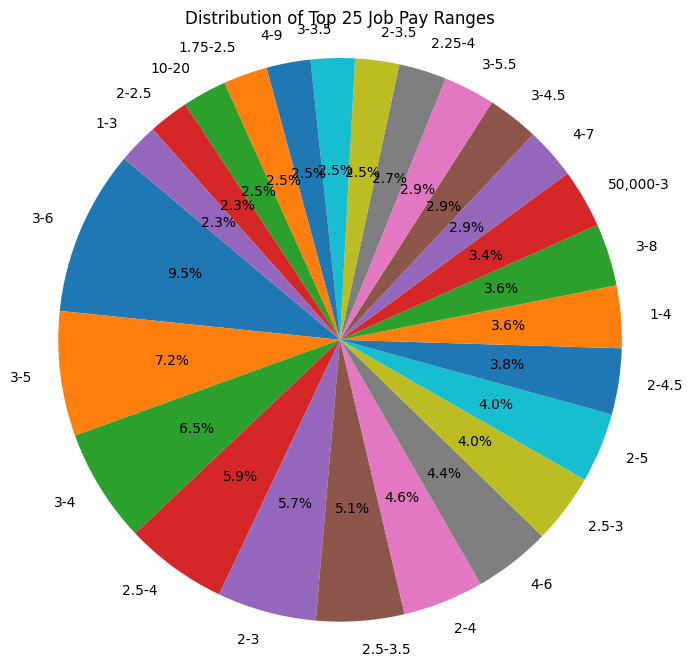

In [564]:
import matplotlib.pyplot as plt

# Count the occurrences of each pay range
pay_counts = pay_data['job_pay'].value_counts()

# Select only the top 25 pay ranges
top_25_pay_counts = pay_counts.head(25)

# Plot a pie chart for the top 25 pay ranges
plt.figure(figsize=(8, 8))
plt.pie(top_25_pay_counts, labels=top_25_pay_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 25 Job Pay Ranges')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
